In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.util import random_noise
import math

In [2]:
bookpage = cv.imread('bookpage.jpg', 0)
building = cv.imread('building.jpg', 0)
checkerboard = cv.imread('checkerboard.png', 0)
objects = cv.imread('objects.png', 0)
fingerprint1 = cv.imread('fingerprint1.jpg',0)
fingerprint2 = cv.imread('fingerprint2.jpg',0)
notch1 = cv.imread('notch1.jpg',0)
notch2 = cv.imread('notch2.png',0)
notch3 = cv.imread('notch3.jpg',0)

### 1. Edge detection techniques

In [3]:
def zero_crossing(image):
    z_c_image = np.zeros(image.shape)
    
    # Count the number of positive and negative pixels in the neighborhood for each pixel
     
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],
                         image[i, j-1],image[i, j+1],
                         image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1


            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel

            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)

    return z_c_image

In [4]:
# function which computes all required images and returns them
def sobel_kernel(img):
    gauss_img = cv.GaussianBlur(img, (3, 3), 1.5)
    # Applying a Sobel filter
    sobel_x = cv.Sobel(gauss_img.copy(), ddepth = cv.CV_16S, dx = 1, dy = 0, ksize = 3)
    sobel_y = cv.Sobel(gauss_img.copy(), ddepth = cv.CV_16S, dx = 0, dy = 1, ksize = 3)
    
    abs_sobel_x = cv.convertScaleAbs(sobel_x)
    abs_sobel_y = cv.convertScaleAbs(sobel_y)
    
    grad = cv.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)
    _, sobel_img = cv.threshold(grad, 50, 255, cv.THRESH_BINARY)
    return sobel_img

# Canny edge detector
def canny_edge(img):
    gauss_img = cv.GaussianBlur(img, (3, 3), 1.5)
    canny_img = cv.Canny(gauss_img.copy(), 50, 100)
    return canny_img

# Laplacian of Gaussian
def LoG_edge(img):
    gauss_img = cv.GaussianBlur(img, (3, 3), 1.5)
    # Laplacian of Gaussian
    laplace = cv.Laplacian(gauss_img.copy(), cv.CV_64F)
    log_temp = zero_crossing(laplace)
    _, log_img = cv.threshold(log_temp, 35, 255, cv.THRESH_BINARY)
    return log_img

# Hough transform
def hough_edge(img):
    dst = cv.Canny(img, 50, 100)
    cdstP = np.copy(dst)
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 3, cv.LINE_AA)
    return cdstP

In [5]:
# Building image

img = building.copy()

sobel_build = sobel_kernel(img)
canny_build = canny_edge(img)
log_build = LoG_edge(img)
hough_build = hough_edge(img)

In [6]:
# Objects image

img = objects.copy()

sobel_obj = sobel_kernel(img)
log_obj = canny_edge(img)
canny_obj = LoG_edge(img)
hough_obj = hough_edge(img)

In [7]:
# Display function
def display_images(captions, images, title, rows = 1):
    
    if rows == 1:
        fig, axs = plt.subplots(1,len(images), figsize = (15,10))

        for i in range(len(images)):
            axs[i].imshow(images[i], cmap = 'gray')
            axs[i].set_title(captions[i])
    else:
        fig, axs = plt.subplots(rows,int(len(images)/rows), figsize = (15,10))
        count = 0
        for i in range(rows):
            for j in range(int(len(images)/rows)):
                axs[i,j].imshow(images[count], cmap = 'gray')
                axs[i,j].set_title(captions[count])
                count = count + 1
        
#     plt.suptitle(title)
    print('                                           '+title)
    plt.show()

In [8]:
# names and images lists
captions_build = ['Original image', 'Sobel filter', 'Laplacian of Gaussian', 'Canny edge detector', 'Hough line detector']
captions_objects = ['Original image', 'Sobel filter', 'Laplacian of Gaussian', 'Canny edge detector', 'Hough line detector']
images_build = [building, sobel_build, log_build, canny_build, hough_build]
images_objects = [objects, sobel_obj, log_obj, canny_obj, hough_obj]

                                           Image of the building


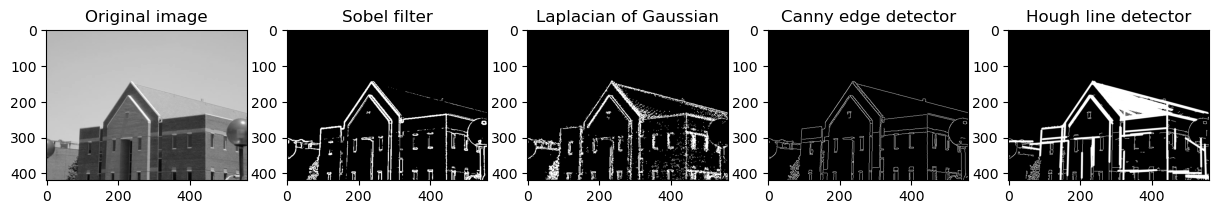

In [9]:
# Building image
fig, axs = plt.subplots(1, len(images_build), figsize = (15,10))
for i in range(len(images_build)):
    axs[i].imshow(images_build[i], cmap = 'gray')
    axs[i].set_title(captions_build[i])
print('                                           '+'Image of the building')
plt.show()

						 Objects image


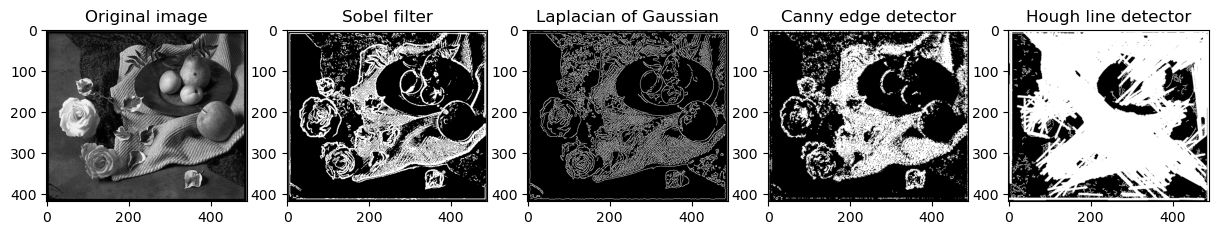

In [10]:
# Objects image
fig, axs = plt.subplots(1, len(images_objects), figsize = (15,10))
for i in range(len(images_objects)):
    axs[i].imshow(images_objects[i], cmap = 'gray')
    axs[i].set_title(captions_objects[i])
print('\t\t\t\t\t\t Objects image')
plt.show()

We observe that in the building image which has well defined straight lines, Hough transform is able to detect the lines very clearly in the image. However, for objects image, we observe that Hough transform fails to detect lines properly. Thus, for images with non-linear boundaries, we need to apply different technique. For example, in the objects image, we find that circular structures are present. One might want to detect these circles using Hough transform. This has been shown below.

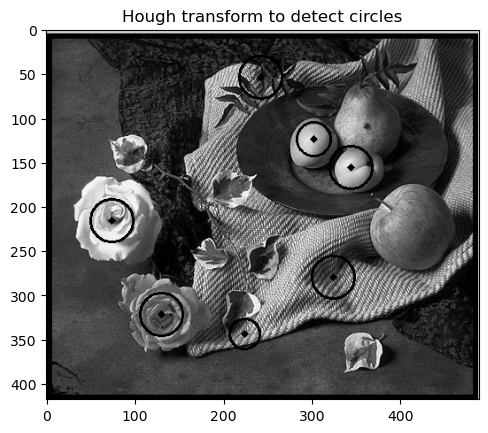

In [11]:
# Using the Hough tranform to detect circles
orig_img = objects.copy()
img = cv.GaussianBlur(objects.copy(), (3, 3), 1.5)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=12,maxRadius=25)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(orig_img, (i[0], i[1]), i[2], (0,255,0), 2)
    # draw the center of the circle
    cv.circle(orig_img, (i[0],i[1]), 2, (0,0,255), 3)
    
plt.imshow(orig_img, cmap = 'gray')
plt.title('Hough transform to detect circles')
plt.show()

### 2. Image noising and denoising

### a) Adding noise to the image

In [12]:
orig_img = checkerboard.copy()

In [13]:
# Add Gaussian noise to the image
noise_gauss = random_noise(orig_img, mode='gaussian', mean = 0, var = 0.05)*255

# Add salt-and-pepper noise to the image.
noise_sap = random_noise(orig_img, mode='s&p', amount = 0.15)*255

# Add periodic noise
noise = np.zeros((orig_img.shape[0], orig_img.shape[1]), dtype='float64')
X, Y = np.meshgrid(range(0, orig_img.shape[0]), range(0, orig_img.shape[1]))
noise += 10*np.cos(30*X + 45*Y) + (-10)*np.cos(-30*X + 45*Y)

noise_periodic = orig_img + noise
noise_periodic += np.abs(np.amin(orig_img + noise))
noise_periodic = (noise_periodic/np.amax(noise_periodic))*255

In [14]:
noise_images = [orig_img, noise_gauss, noise_sap, noise_periodic]
noise_captions = ['Original image', 'Gaussian noise', 'Salt and pepper noise', 'Periodic noise']

						 Various types of noise added to the image


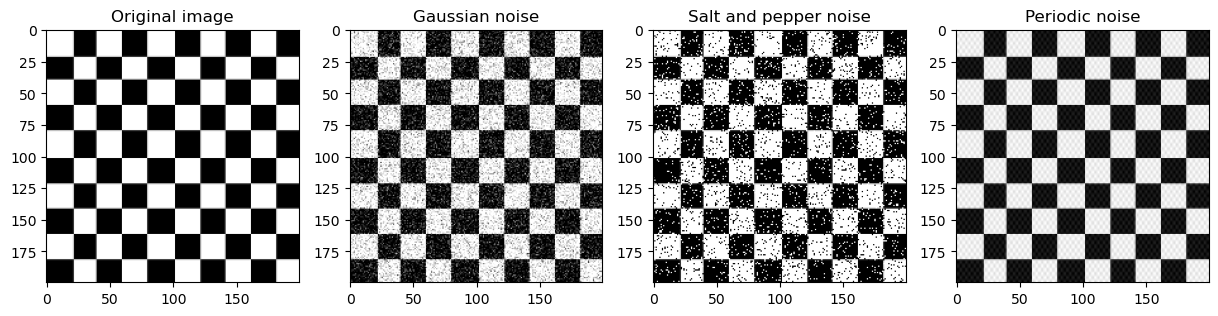

In [15]:
fig, axs = plt.subplots(1,len(noise_images), figsize = (15,10))
for i in range(len(noise_images)):
    axs[i].imshow(noise_images[i], cmap = 'gray')
    axs[i].set_title(noise_captions[i])
    
print('\t\t\t\t\t\t Various types of noise added to the image')
plt.show()

### b) Denoising the images

In [16]:
def gaussian_notch_filter(fshift, points, d0 = 0.5):
    m = fshift.shape[0]
    n = fshift.shape[1]
    for u in range(m):
        for v in range(n):
            for d in range(len(points)):
                u0 = points[d][0]
                v0 = points[d][1]

                d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
                d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5)
                fshift[u][v] *= (1 - np.exp(-0.5 * (d1 * d2 / pow(d0, 2))))

    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

In [17]:
def ideal_notch_filter(fshift, points, d0 = 0):
    m = fshift.shape[0]
    n = fshift.shape[1]
    for u in range(m):
        for v in range(n):
            for d in range(len(points)):
                u0 = points[d][0]
                v0 = points[d][1]
                u0, v0 = v0, u0
                d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 1)
                d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 1)
                if d1 <= d0 or d2 <= d0:
                    fshift[u][v] *= 0.0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

In [18]:
def butterworth_notch_filter(fshift, points, d0 = 0.5, order = 1):
    m = fshift.shape[0]
    n = fshift.shape[1]
    for u in range(m):
        for v in range(n):
            for d in range(len(points)):
                u0 = points[d][0]
                v0 = points[d][1]

                eps = 1e-5
                d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5) + eps
                d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5) + eps
                fshift[u][v] *= (1.0 / (1 + pow((d0 * d0) / (d1 * d2), order))) 

    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

In [19]:
def apply_notch(img, filter_type, limit = 5, increment = 10, size = 12):
    
    # Fourier transform to get the magnitude spectrum
    f = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f)
    trans_image = 20*np.log(1 + np.abs(np.fft.fftshift(f)))
    
    # To select points where the spikes occur
    # list which stores the spikes other than the dc component
    l = list(np.zeros(size * 2))
    
    # to store the coordinates of the points
    coordinates = []
    
    # storing the values of spikes in a list
    while(len(l) > size):
        l = [i for i in trans_image.ravel() if i > limit]
        l = l[:int(len(l)/2)] + l[int(len(l)/2+ 1): ]
        limit += increment
        
    # Find the spikes other than dc component to reduce noise
    for i in range(trans_image.shape[0]):
        for j in range(trans_image.shape[1]):
            if trans_image[i,j] in l:
                coordinates.append((i, j))
            
    # Type of filter
    if filter_type == 'Ideal':
        result = ideal_notch_filter(f_shift, coordinates)
        
    if filter_type == 'Gaussian':
        result = gaussian_notch_filter(f_shift, coordinates)
        
    if filter_type == 'Butterworth':
        result = butterworth_notch_filter(f_shift, coordinates)

    return(result)

In [20]:
def denoise(img, limit = 5, increment = 1):
    
    # Gaussian filter
    denoise_gauss = cv.GaussianBlur(img, (5,5), 1.5)

    # Median filter
    denoise_med = cv.medianBlur(img.astype('uint8'), 5)
    
    # Butterworth
    denoise_notch_bw = apply_notch(img.copy(), filter_type = 'Butterworth', limit = limit, increment = increment)
    
    # Ideal
    denoise_notch_ideal = apply_notch(img.copy(), filter_type = 'Ideal', limit = limit, increment = increment)
    
    return denoise_gauss, denoise_med, denoise_notch_bw, denoise_notch_ideal
    
def denoise_notch(img, limit = 5, increment = 1):
    
    # Notch filters
    denoise_notch_gauss = apply_notch(img.copy(), filter_type = 'Gaussian', limit = limit, increment = increment)
    denoise_notch_bw = apply_notch(img.copy(), filter_type = 'Butterworth', limit = limit, increment = increment)
    denoise_notch_ideal = apply_notch(img.copy(), filter_type = 'Ideal', limit = limit, increment = increment)
    
    return denoise_notch_gauss, denoise_notch_bw, denoise_notch_ideal

In [21]:
denoise_gauss_gauss, denoise_gauss_med, denoise_gauss_bw, denoise_gauss_ideal = denoise(noise_gauss)
denoise_sap_gauss, denoise_sap_med, denoise_sap_bw, denoise_sap_ideal = denoise(noise_sap)
denoise_per_gauss, denoise_per_med, denoise_per_bw, denoise_per_ideal = denoise(noise_periodic)

In [22]:
gauss_images = [noise_gauss, denoise_gauss_gauss, denoise_gauss_med, denoise_gauss_bw, denoise_gauss_ideal]
sap_images = [noise_sap, denoise_sap_gauss, denoise_sap_med, denoise_sap_bw, denoise_sap_ideal]
per_images = [noise_periodic, denoise_per_gauss, denoise_per_med, denoise_per_bw, denoise_per_ideal]

captions = ['Gaussian filter', 'Median filter', 'Butterworth Notch filter', 'Ideal Notch filter']
gauss_captions = ['Image with Gaussian noise'] + captions
sap_captions = ['Image with Salt & Pepper noise'] + captions
per_captions = ['Image with periodic noise'] + captions

						 Denoising Gaussian noise


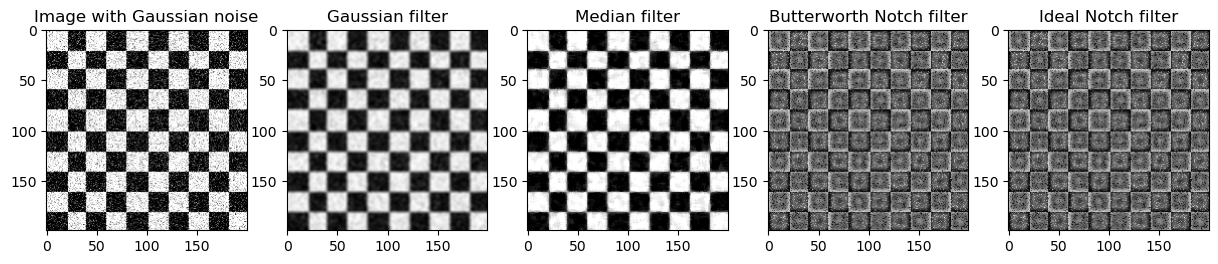

In [23]:
# Denoising Gaussian noise
fig, axs = plt.subplots(1, len(gauss_images), figsize = (15, 10))
for i in range(len(gauss_images)):
    axs[i].imshow(gauss_images[i], cmap = 'gray')
    axs[i].set_title(gauss_captions[i])
print('\t\t\t\t\t\t Denoising Gaussian noise')
plt.show()

						 Denoising Salt and Pepper noise


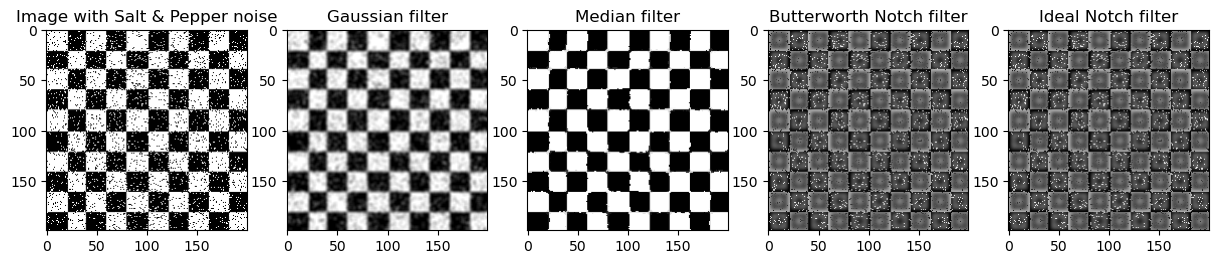

In [24]:
# Denoising sap noise
fig, axs = plt.subplots(1,len(sap_images), figsize = (15,10))
for i in range(len(sap_images)):
    axs[i].imshow(sap_images[i], cmap = 'gray')
    axs[i].set_title(sap_captions[i])
print('\t\t\t\t\t\t Denoising Salt and Pepper noise')
plt.show()

						 Denoising Periodic noise


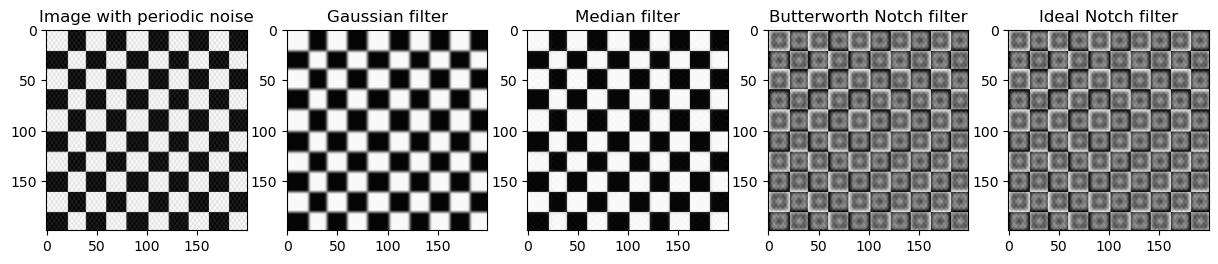

In [25]:
# Denoising periodic noise
fig, axs = plt.subplots(1,len( per_images), figsize = (15,10))
for i in range(len(per_images)):
    axs[i].imshow(per_images[i], cmap = 'gray')
    axs[i].set_title(per_captions[i])
print('\t\t\t\t\t\t Denoising Periodic noise')
plt.show()

We observe that in all of the 3 cases, median filter performs the best in denoising the noisy images.

### c) Applying notch filter to the images

In [26]:
# Notch 1 image
denoise_notch1_gauss, denoise_notch1_bw, denoise_notch1_ideal = denoise_notch(notch1)

# Notch 2 image
denoise_notch2_gauss, denoise_notch2_bw, denoise_notch2_ideal = denoise_notch(notch2)

# Notch 3 image
denoise_notch3_gauss, denoise_notch3_bw, denoise_notch3_ideal = denoise_notch(notch3, limit = 200, increment = 100)

In [27]:
notch_captions = ['Original image', 'Gaussian', 'Butterworth', 'Ideal']
notch1_images = [notch1, denoise_notch1_gauss, denoise_notch1_bw, denoise_notch1_ideal]
notch2_images = [notch2, denoise_notch2_gauss, denoise_notch2_bw, denoise_notch2_ideal]
notch3_images = [notch3, denoise_notch3_gauss, denoise_notch3_bw, denoise_notch3_ideal]

						 Notch filter on notch1.jpg


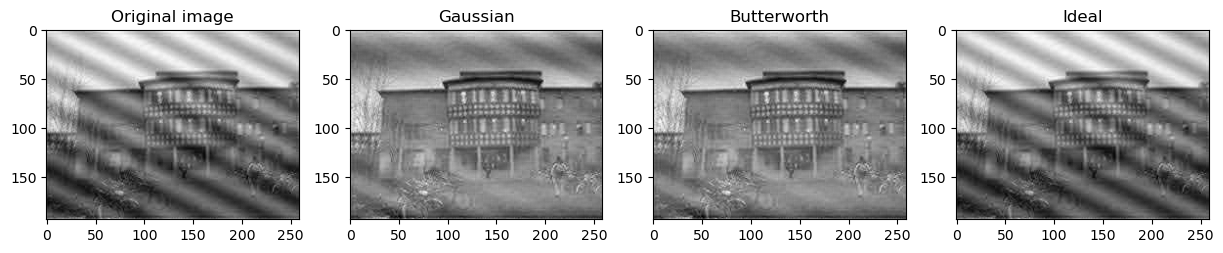

In [28]:
# Notch 1 image
fig, axs = plt.subplots(1, len(notch1_images), figsize = (15,10))
for i in range(len(notch1_images)):
    axs[i].imshow(notch1_images[i], cmap = 'gray')
    axs[i].set_title(notch_captions[i])
print('\t\t\t\t\t\t Notch filter on notch1.jpg')
plt.show()

						 Notch filter on notch2.png


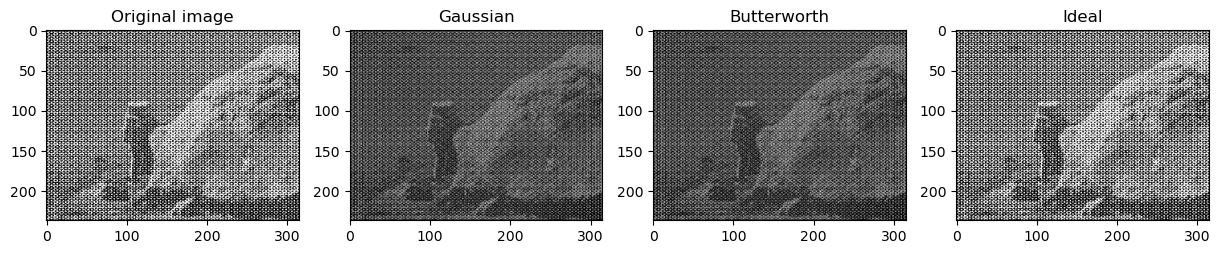

In [29]:
# Notch 2 image
fig, axs = plt.subplots(1, len(notch2_images), figsize = (15,10))
for i in range(len(notch2_images)):
    axs[i].imshow(notch2_images[i], cmap = 'gray')
    axs[i].set_title(notch_captions[i])
print('\t\t\t\t\t\t Notch filter on notch2.png')
plt.show()

						 Notch filter on notch3.jpg


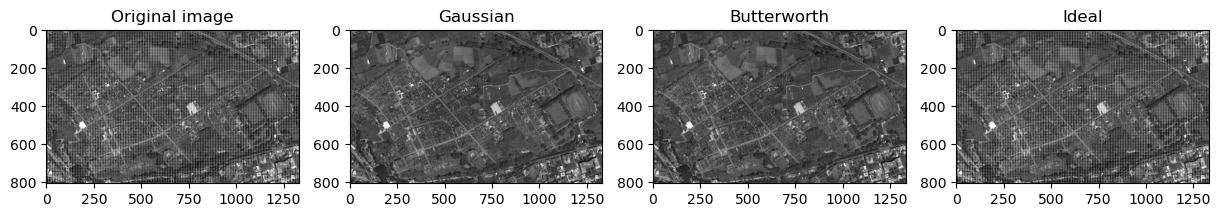

In [30]:
# Notch 3 image
fig, axs = plt.subplots(1, len(notch2_images), figsize = (15,10))
for i in range(len(notch3_images)):
    axs[i].imshow(notch3_images[i], cmap = 'gray')
    axs[i].set_title(notch_captions[i])
print('\t\t\t\t\t\t Notch filter on notch3.jpg')
plt.show()

### 3.

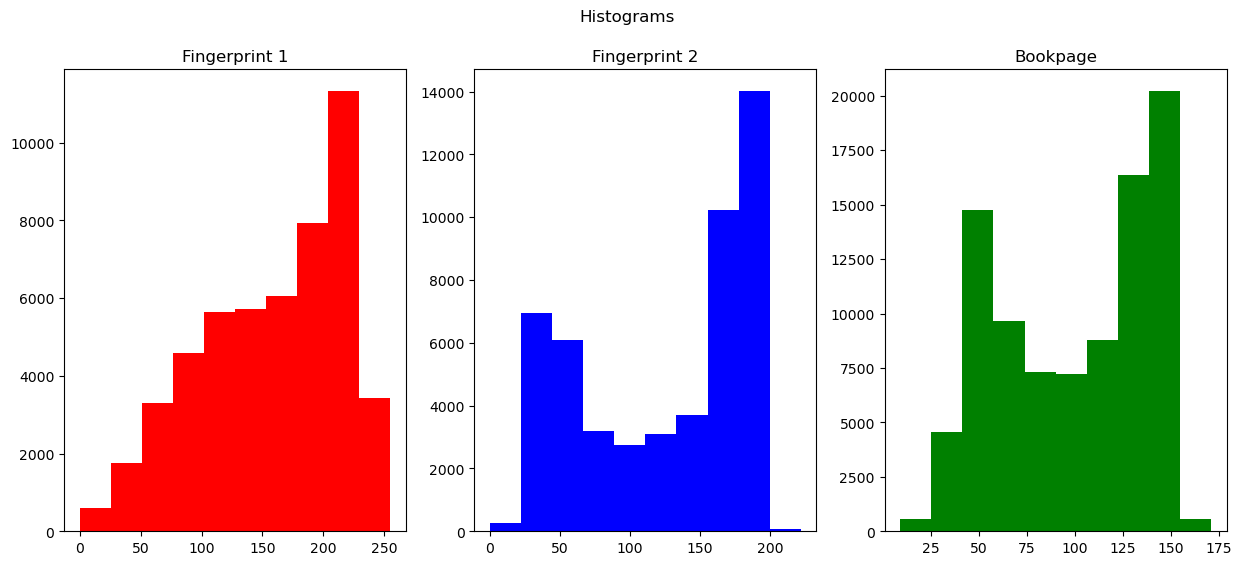

In [31]:
fig, axs = plt.subplots(1,3, figsize = (15, 6))
axs[0].hist(fingerprint1.flatten(), color = 'r')
axs[0].set_title('Fingerprint 1')

axs[1].hist(fingerprint2.flatten(), color = 'b')
axs[1].set_title("Fingerprint 2")

axs[2].hist(bookpage.flatten(), color = 'g')
axs[2].set_title("Bookpage")

plt.suptitle('Histograms')
plt.show()

### a) Global thresholding

We fix the thresholds manually by looking at the histograms. 
<ol>
    <li> Fingerprint 1: 125 </li>
    <li> Fingerprint 2: 100 </li>
    <li> Bookpage: 87 </li>

In [32]:
# Global thresholding
_, global_finger1 = cv.threshold(fingerprint1, 125, 255, cv.THRESH_BINARY)
_, global_finger2 = cv.threshold(fingerprint2, 100, 255, cv.THRESH_BINARY)
_, global_book = cv.threshold(bookpage, 87, 255, cv.THRESH_BINARY)

In [33]:
# images and captions
global_images = [fingerprint1, fingerprint2, bookpage, global_finger1, global_finger2, global_book]
global_captions = ['Fingerprint 1', 'Fingerprint 2', 'Bookpage', 'Fingerprint 1 (after thresholding)',
                  'Fingerprint 2 (after thresholding)', 'Bookpage (after thresholding)']

						 Global Thresholding


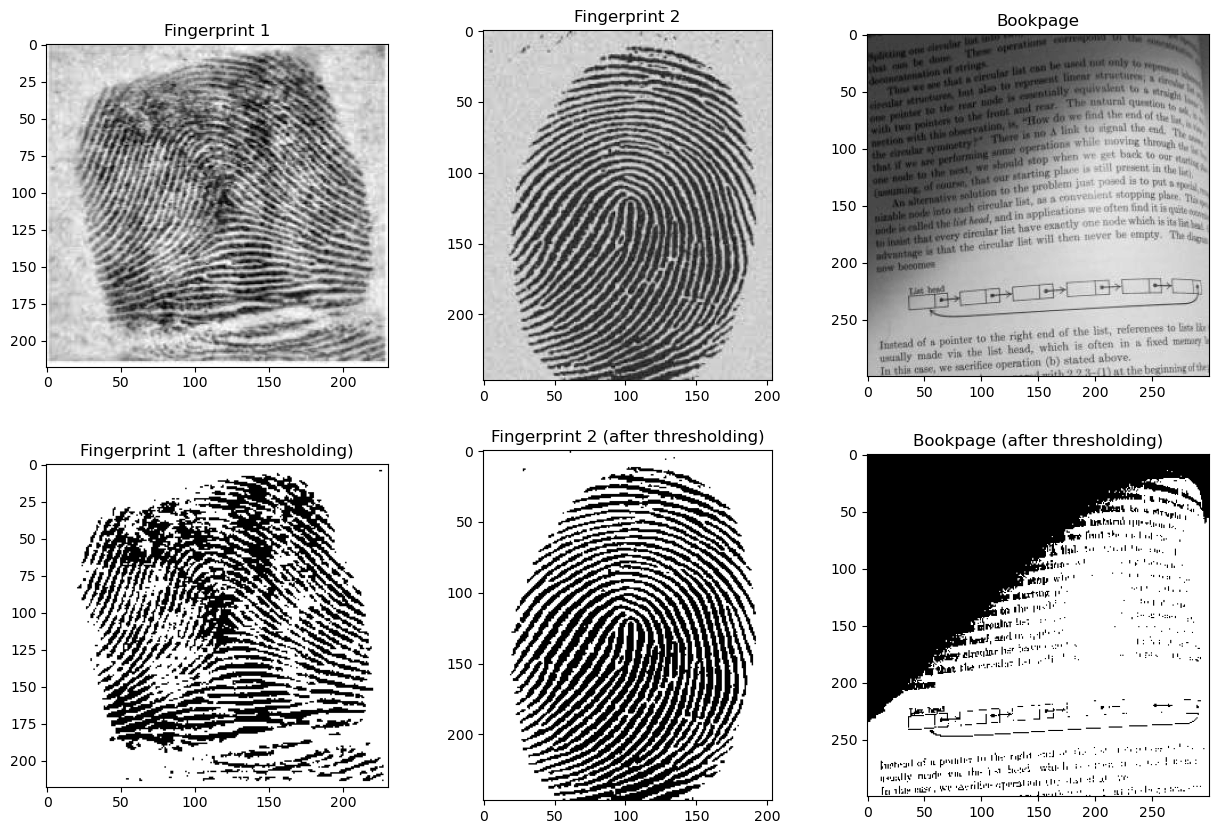

In [34]:
rows = 2
fig, axs = plt.subplots(rows, int(len(global_images)/rows), figsize = (15,10))
count = 0
for i in range(rows):
    for j in range(int(len(global_images)/rows)):
        axs[i,j].imshow(global_images[count], cmap = 'gray')
        axs[i,j].set_title(global_captions[count])
        count +=1 

print('\t\t\t\t\t\t Global Thresholding')
plt.show()

### b) Otsu's method

In [35]:
ret1, otsu_finger1 = cv.threshold(fingerprint1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, otsu_finger2 = cv.threshold(fingerprint2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, otsu_book = cv.threshold(bookpage,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [36]:
print('Threshold for fingerprint 1: ', ret1)
print('Threshold for fingerprint 2: ', ret2)
print('Threshold for bookpage: ', ret3)

Threshold for fingerprint 1:  149.0
Threshold for fingerprint 2:  113.0
Threshold for bookpage:  95.0


### We observe that the thresholds obtained are different from what  we had assumed them to be based on the histograms of the images.

In [37]:
# images and captions
otsu_images = [fingerprint1, fingerprint2, bookpage, otsu_finger1, otsu_finger2, otsu_book]
otsu_captions = ['Fingerprint 1', 'Fingerprint 2', 'Bookpage', 'Fingerprint 1 (after thresholding)',
                  'Fingerprint 2 (after thresholding)', 'Bookpage (after thresholding)']

						 Thresholding using Otsu's Method


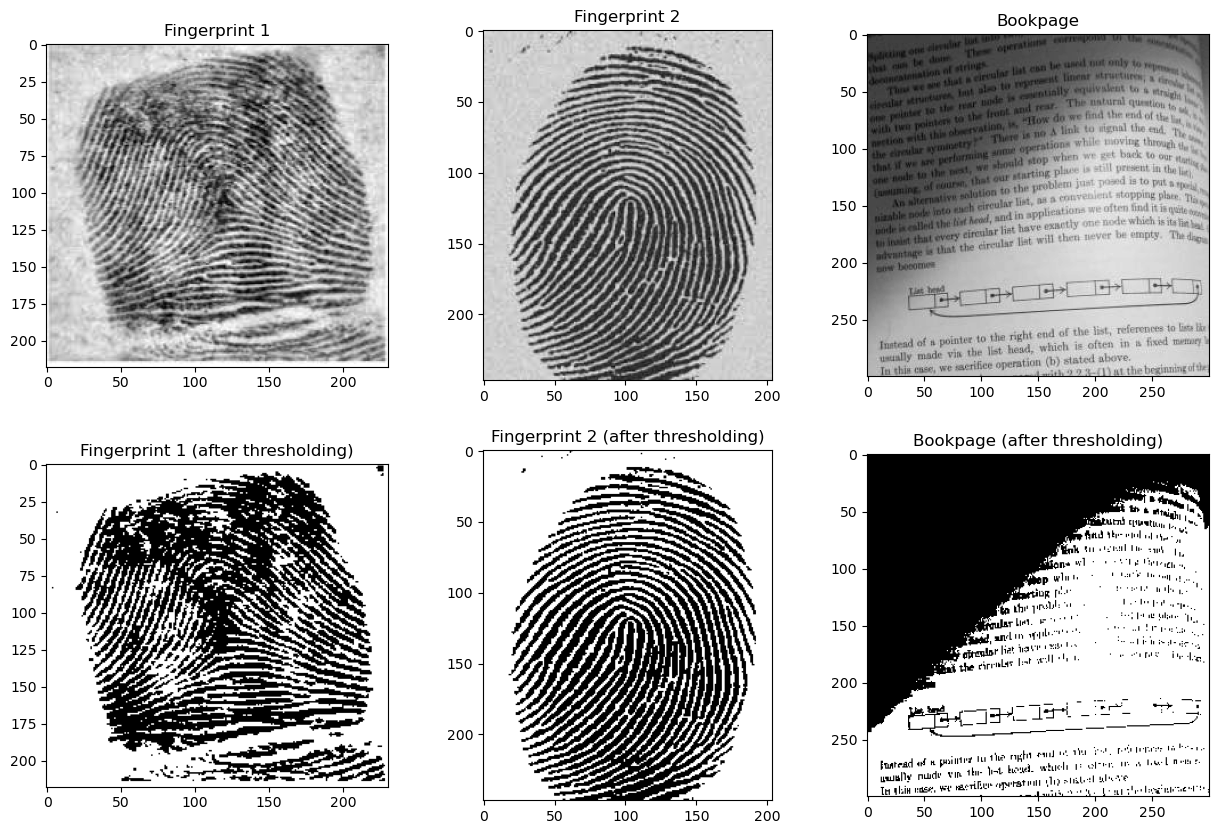

In [38]:
fig, axs = plt.subplots(2, int(len(otsu_images)/2), figsize = (15,10))
count = 0
for i in range(2):
    for j in range(int(len(otsu_images)/2)):
        axs[i,j].imshow(otsu_images[count], cmap = 'gray')
        axs[i,j].set_title(otsu_captions[count])
        count +=1 

print("\t\t\t\t\t\t Thresholding using Otsu's Method")
plt.show()

### c) Adaptive thresholding

In [39]:
# Mean and Gaussian thresholding
adapt_mean_finger1 = cv.adaptiveThreshold(fingerprint1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
adapt_gauss_finger1 = cv.adaptiveThreshold(fingerprint1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

adapt_mean_finger2 = cv.adaptiveThreshold(fingerprint2, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
adapt_gauss_finger2 = cv.adaptiveThreshold(fingerprint2, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

adapt_mean_book = cv.adaptiveThreshold(bookpage, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
adapt_gauss_book = cv.adaptiveThreshold(bookpage, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

In [40]:
# images and captions
adapt_mean_images = [fingerprint1, fingerprint2, bookpage, adapt_mean_finger1, adapt_mean_finger2, adapt_mean_book]
adapt_mean_captions = ['Fingerprint 1', 'Fingerprint 2', 'Bookpage', 'Fingerprint 1 after thresholding',
                  'Fingerprint 2 after thresholding', 'Bookpage after thresholding']

adapt_gauss_images = [fingerprint1, fingerprint2, bookpage, adapt_gauss_finger1, adapt_gauss_finger2, adapt_gauss_book]
adapt_gauss_captions = ['Fingerprint 1', 'Fingerprint 2', 'Bookpage', 'Fingerprint 1 after thresholding',
                  'Fingerprint 2 after thresholding', 'Bookpage after thresholding']

adapt_images = [fingerprint1, fingerprint2, bookpage, adapt_mean_finger1, adapt_mean_finger2, adapt_mean_book,
               adapt_gauss_finger1, adapt_gauss_finger2, adapt_gauss_book]
adapt_captions = ['Fingerprint 1', 'Fingerprint 2', 'Bookpage', 'Fingerprint 1 after mean thresholding',
                  'Fingerprint 2 after mean thresholding', 'Bookpage after mean thresholding', 
                  'Fingerprint 1 after Gaussian thresholding', 'Fingerprint 2 after Gaussian thresholding', 
                  'Bookpage after Gaussian thresholding']

						 Adaptive Mean Thresholding


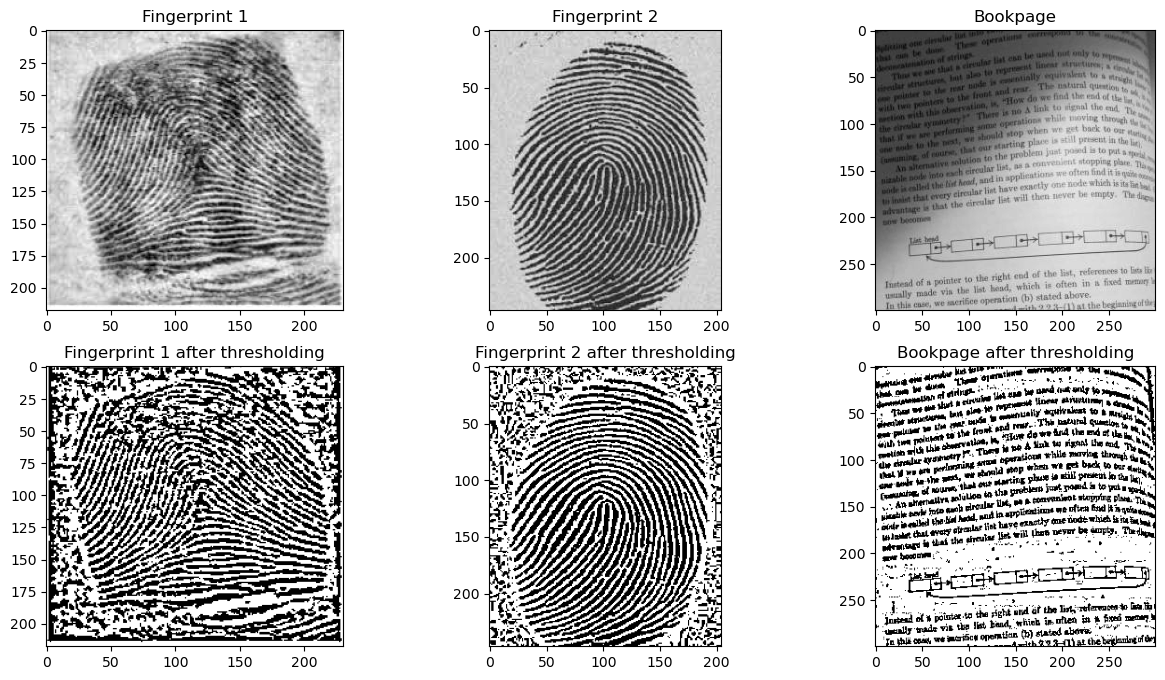

In [41]:
# Adaptive Mean Thresholding

fig, axs = plt.subplots(2, int(len(adapt_mean_images)/2), figsize = (15,8))
count = 0
for i in range(2):
    for j in range(int(len(adapt_mean_images)/2)):
        axs[i,j].imshow(adapt_mean_images[count], cmap = 'gray')
        axs[i,j].set_title(adapt_mean_captions[count])
        count +=1 

print("\t\t\t\t\t\t Adaptive Mean Thresholding")
plt.show()

						 Adaptive Gaussian Thresholding


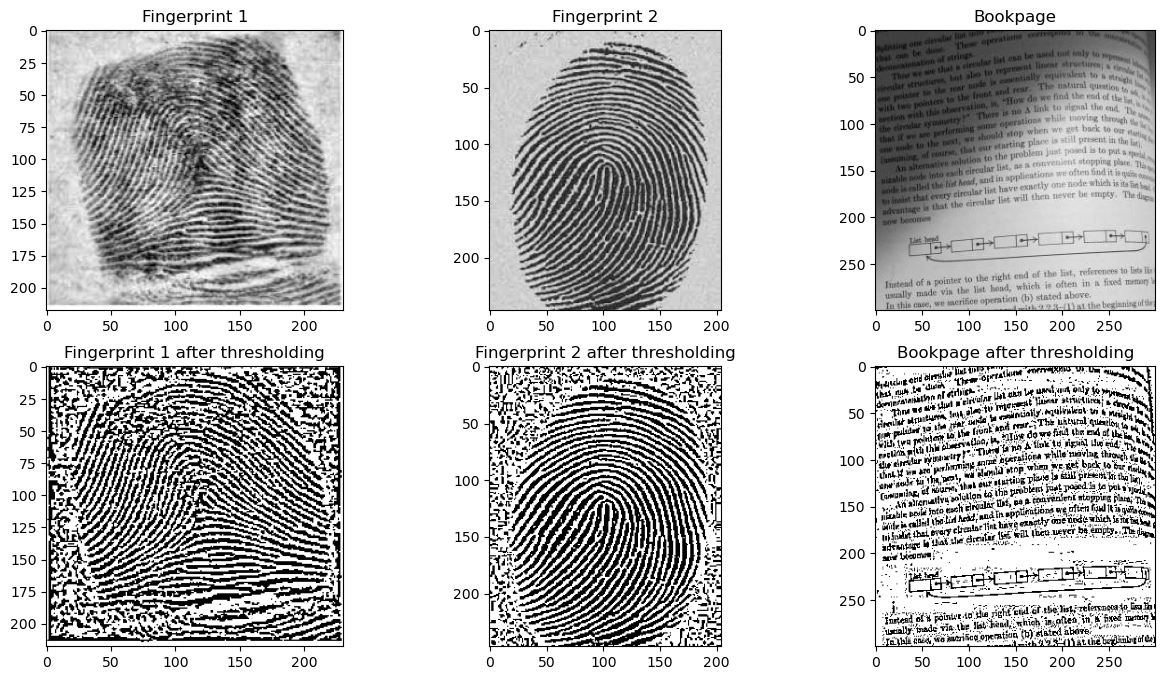

In [42]:
# Adaptive Gaussian thresholding

fig, axs = plt.subplots(2, int(len(adapt_gauss_images)/2), figsize = (15,8))
count = 0
for i in range(2):
    for j in range(int(len(adapt_gauss_images)/2)):
        axs[i,j].imshow(adapt_gauss_images[count], cmap = 'gray')
        axs[i,j].set_title(adapt_gauss_captions[count])
        count +=1 

print("\t\t\t\t\t\t Adaptive Gaussian Thresholding")
plt.show()

						 Adaptive Thresholding


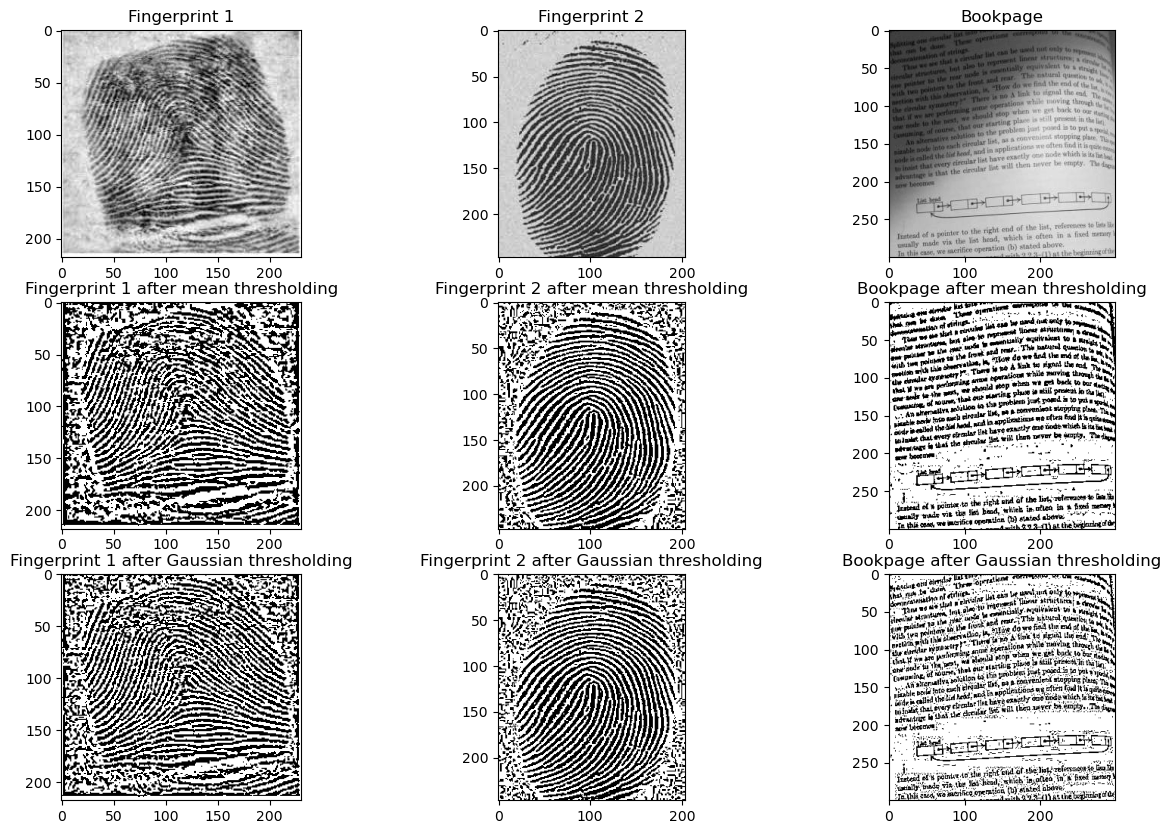

In [44]:
# Adaptive thresholding combined

fig, axs = plt.subplots(3, int(len(adapt_images)/3), figsize = (15,10))
count = 0
for i in range(3):
    for j in range(int(len(adapt_images)/3)):
        axs[i,j].imshow(adapt_images[count], cmap = 'gray')
        axs[i,j].set_title(adapt_captions[count])
        count +=1 

print("\t\t\t\t\t\t Adaptive Thresholding")
plt.show()

We observe that for fingerprint1 and fingerprint2, Global thresholding and Otsu's method work better than adaptive thresholding method. Otsu's method for finding the threshold provides slightly better results than Global thresholding. This is because in Global thresholding, we decide the threshold manually, whereas in Otsu's method we use the ratio of variances to fix the threshold.

Adaptive thresholding methods (Gaussian and mean), work better than Global thresholding and Otsu's method for the bookpage image. The two types of adaptive thresholding method, Gaussian and mean, provide comparable results.